 UZAIR ZIA QURESHI
197022
ASSIGNMENT: MNIST DATASET IN CNN
10/6/22
SUBMITTED TO: SIR EHTISHAM

In [ ]:
import tensorflow as tf 

 Loading MNIST Dataset 
Containing Training Samples = 60,000 , Testing Samples = 10,000
Tensorflow already contain mnist dataset which can be imported by keras

In [3]:
mnist = tf.keras.datasets.mnist #keras is api for loading datasets from tensorflow

In [4]:
#After loading mnist dataset, divide into test and train datasets

In [39]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [6]:
x_train.shape

(60000, 28, 28)

In [41]:
x_test.shape

(10000, 28, 28)

In [7]:
import matplotlib.pyplot as plt

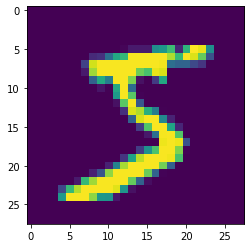

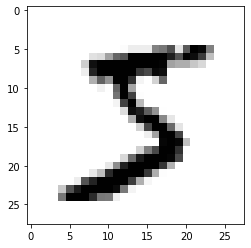

In [10]:
#just checking the graph how data looks like

plt.imshow(x_train[0])
plt.show() #in order to execute the graph
plt.imshow(x_train[0], cmap = plt.cm.binary) #we dont know whether it is color image or binary image so convert it into binary

In [11]:
#checking the values of each pixel before Normalizaiton
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [12]:
#As images are in gray level (1 channel ==> 0-255 not colored (RGB))
# Normalizing the data | Preprocessing Step


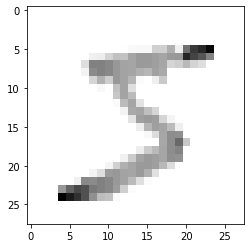

In [13]:
#in gray image all values varies from 0 to 255 ==> 0 is black and 255 is white
#in order to normalize it

x_train = tf.keras.utils.normalize (x_train, axis =1)
x_test = tf.keras.utils.normalize (x_train, axis =1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [14]:
#after normalization you can see all values are converted into 0 and 1
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [15]:
print(y_train[0]) #just to verify that we have labels in our network

5


In [ ]:
#Resizing image to make it suitable for apply Convultion operation

In [47]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

print("Training Samlples Dimension:", x_trainr.shape)
print("Testing Samples Dimension:", x_testr.shape)

Training Samlples Dimension: (60000, 28, 28, 1)
Testing Samples Dimension: (10000, 28, 28, 1)


# Creating a Deep Neural Network
#Trainin on 60000 MNIST handwritten dataset

In [20]:
from tensorflow.keras.models import Sequential #sequentially connnected deep learling layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [53]:
#Creating a nerual network now
model = Sequential()

#First Convulution Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) #only for 1st layer to mention input layer size
model.add(Activation("relu")) #activation funtion to make it non linear >0 remove, <0 allow for next layer
model.add(MaxPooling2D(pool_size = (2,2))) #Maxpooling, single maximum value of 2x2

#Second Convulution Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) #only for 1st layer to mention input layer size
model.add(Activation("relu")) #activation funtion to make it non linear >0 remove, <0 allow for next layer
model.add(MaxPooling2D(pool_size = (2,2))) #Maxpooling, single maximum value of 2x2

#Third Convulution Layer
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) #only for 1st layer to mention input layer size
model.add(Activation("relu")) #activation funtion to make it non linear >0 remove, <0 allow for next layer
model.add(MaxPooling2D(pool_size = (2,2))) #Maxpooling, single maximum value of 2x2

##ONLY PROPOGATING MAXIMUM VALUES TO THE NEXT LAYER

#Fully connected layer # 1
model.add (Flatten()) ### before using fully connected layer, need to be flatten so that 2D to 1D e.g 20x20 = 400
model.add (Dense(64))
model.add (Activation("relu"))

#Fully connected layer # 2
model.add (Dense(32))
model.add (Activation("relu"))

#Last fully connected layer , output must be equal to the number of classes 10 (0-9)
model.add(Dense(10)) ##this last dense layer must be equal to 10
model.add(Activation("softmax")) ##function changed to softmax becaue of Class Probabilities

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [26]:
print("Total Training Samples", len(x_trainr))

Total Training Samples 60000


In [58]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [59]:
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3) ## Training my model

Epoch 1/5
1313/1313 [==============================] - 55s 41ms/step - loss: 0.3337 - accuracy: 0.9088 - val_loss: 0.1177 - val_accuracy: 0.9648
Epoch 2/5
1313/1313 [==============================] - 53s 41ms/step - loss: 0.1047 - accuracy: 0.9686 - val_loss: 0.0875 - val_accuracy: 0.9726
Epoch 3/5
1313/1313 [==============================] - 53s 41ms/step - loss: 0.0835 - accuracy: 0.9752 - val_loss: 0.0774 - val_accuracy: 0.9772
Epoch 4/5
1313/1313 [==============================] - 53s 41ms/step - loss: 0.0669 - accuracy: 0.9796 - val_loss: 0.0727 - val_accuracy: 0.9784
Epoch 5/5
1313/1313 [==============================] - 53s 41ms/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0794 - val_accuracy: 0.9766


In [60]:
#Evaluating on Testing Dataset MNIST
test_loss , test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples", test_loss)
print("Validation accuracy on 10,000 test samples", test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0826 - accuracy: 0.9755
Test loss on 10,000 test samples 0.08260305970907211
Validation accuracy on 10,000 test samples 0.9754999876022339


In [62]:
#Prediction 
predictions = model.predict([x_testr])

313/313 [==============================] - 4s 11ms/step


In [63]:
print(predictions) #these predictions are based on one hot encoding so there are only arrays containing softmax class probabilities

[[4.3026243e-06 3.9706715e-06 5.9606446e-06 ... 9.9998057e-01
  1.5669730e-08 3.0685403e-06]
 [3.9848516e-07 9.7917550e-08 9.9989808e-01 ... 1.0088673e-04
  2.2748348e-09 1.2500875e-09]
 [2.0860492e-08 9.9999118e-01 3.4679636e-07 ... 3.5112175e-06
  4.3093305e-06 8.8573387e-08]
 ...
 [5.0056403e-10 1.2404904e-08 2.1073397e-10 ... 1.9646595e-08
  1.2323426e-08 4.4204950e-05]
 [1.0066193e-06 7.1684525e-07 1.4711282e-09 ... 3.7713787e-07
  6.2955991e-07 1.9505637e-06]
 [6.0001264e-07 6.3446714e-07 1.0808450e-06 ... 6.2513474e-09
  6.1499736e-06 9.0635027e-08]]


In [64]:
#inorder to understand we need to convert from one hot enconding, we will use numpy for that
print(np.argmax(predictions[0])) #argmax will return the maximum value index and find the value of that

7


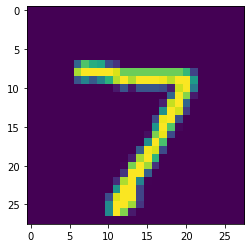

In [65]:
plt.imshow(x_testr[0])

In [66]:
print(np.argmax(predictions[156]))

6


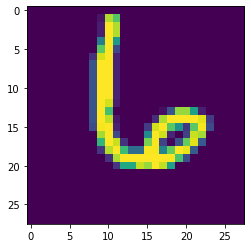

In [67]:
plt.imshow(x_testr[156])

In [68]:
import cv2

In [90]:
img = cv2.imread('five.png')